# Creating Animations using `ffmpeg`

### Python Workshops 2024, 2025 - University of Toledo

#### Author:  Ryan Hazlett

<b>Email:  </b> ryan.hazlett@rockets.utoledo.edu 

***

## Overview

- A quick example of how to create an animation in Python from saved figures.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ffmpeg
from IPython.display import Video

#### Create a Directory to Store Figures

In [2]:
# Directory 
directory = "plots"
   
# Parent Directory path is current working directory
parent_dir = os.getcwd()
   
# Path 
path = os.path.join(parent_dir, directory) 
   
# Create the directory
os.makedirs(path, exist_ok=True)
print("Directory '%s' created" %directory) 

Directory 'plots' created


#### Make Plots to Combine into an Animation

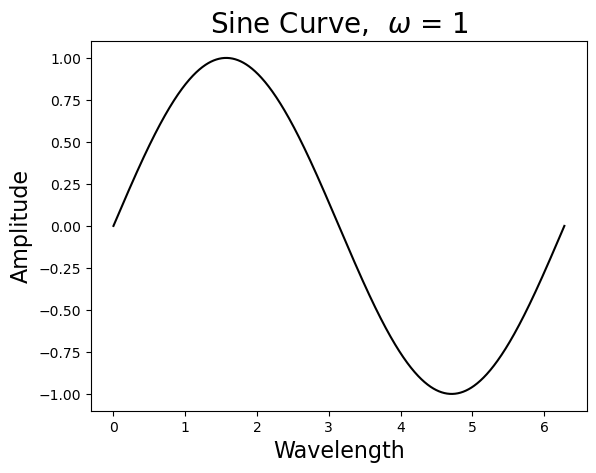

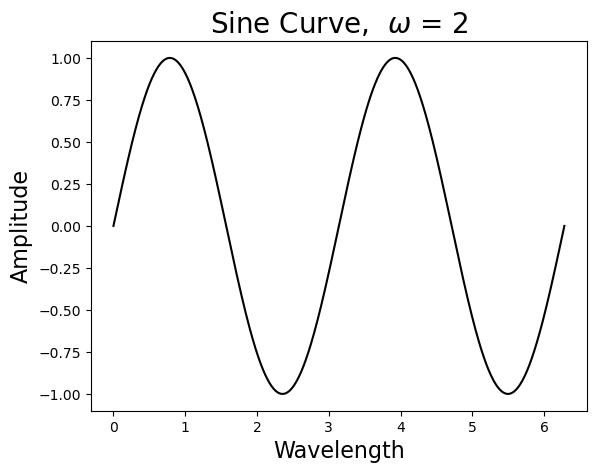

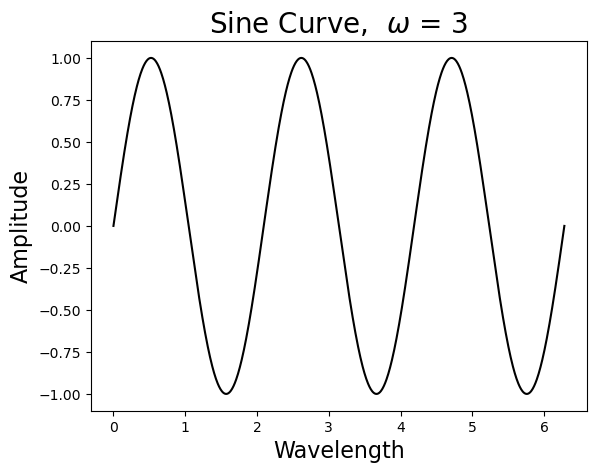

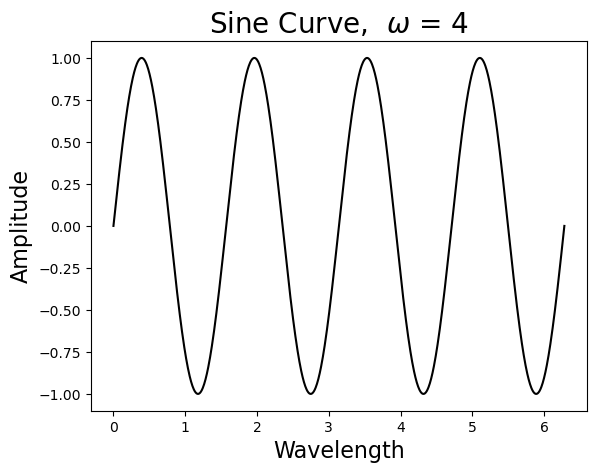

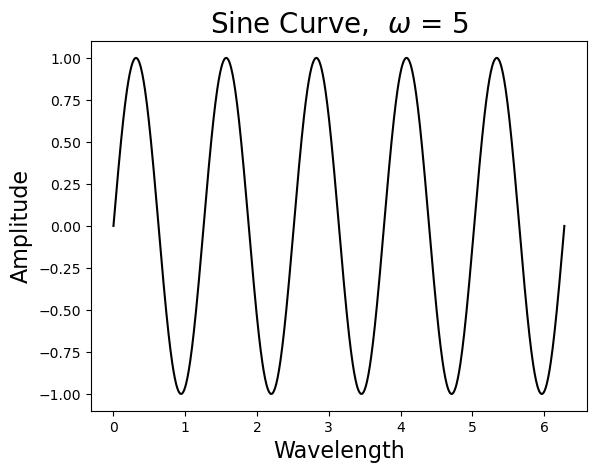

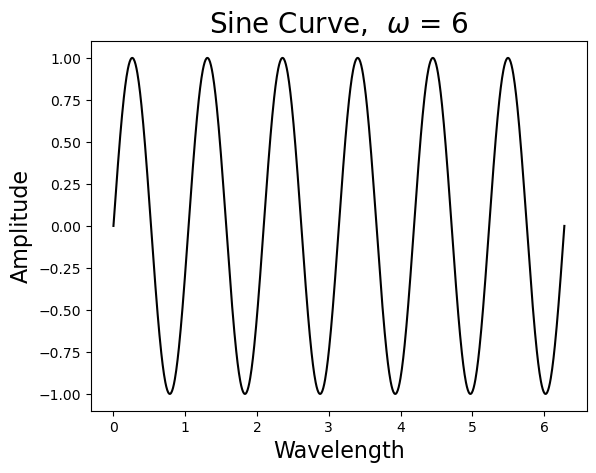

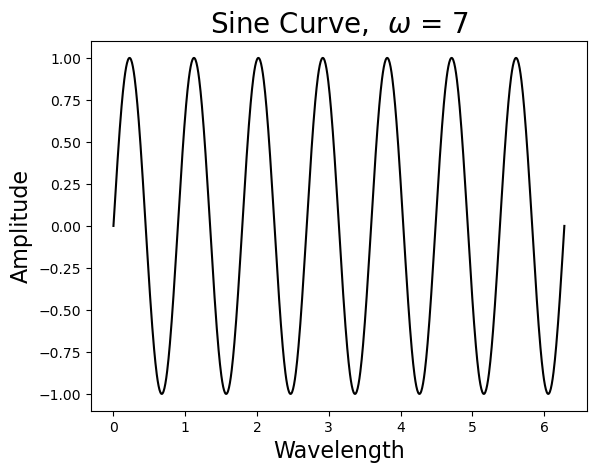

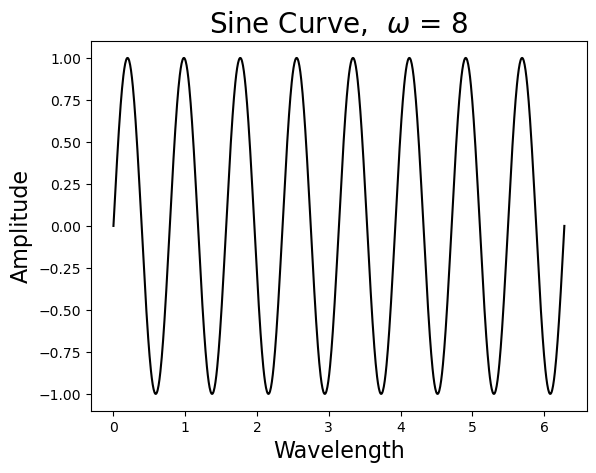

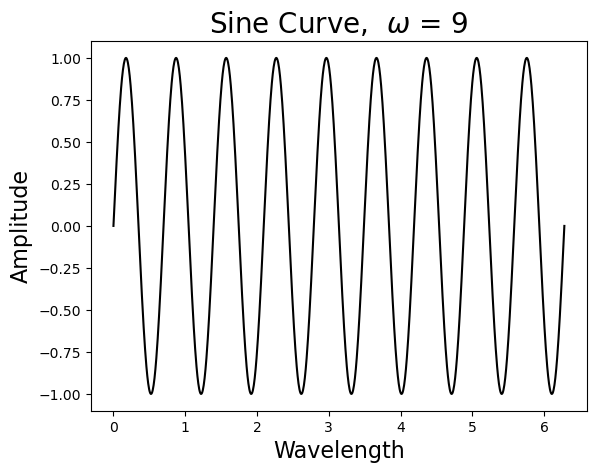

In [3]:
x = np.linspace(0,2*np.pi,1000)
freq = np.arange(1,10)

for i in range(len(freq)):
    sine_curve = np.sin(freq[i]*x)
    plt.title(r"Sine Curve,  $\omega$ = {:.0f}".format(freq[i]),fontsize=20)
    plt.xlabel("Wavelength",fontsize=16)
    plt.ylabel("Amplitude",fontsize=16)
    plt.plot(x,sine_curve,color="black")
    plt.savefig(path+"/sin_freq_{:.0f}.png".format(freq[i]),facecolor='white',transparent=False,dpi=300)
    plt.show()

### Generate Animation with `ffmpeg`

- Enconder `libx264` and Pixel Format `yuv420p` important to be compatible with MP4 video format. 

In [4]:
# Output Animation Name
output_movie = 'sin_func_movie'

# Framerate (How fast your animation is)
fr = 2

# ffmpeg command
(
	ffmpeg.input(path+'/*.png', pattern_type='glob',framerate=fr)
	.output(output_movie+'.mp4',vcodec='libx264',pix_fmt='yuv420p')
	.run(overwrite_output=True)
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/Users/Ryan/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, image2, from '/Users/Ryan/

(None, None)

### View Animation

In [5]:
Video("sin_func_movie.mp4",width=1000,height=1000)